##### 自動回覆訊息
順利將 LINE BOT 串接 Webhook 後，就能透過 LINE Message API 開發聊天機器人，這篇教學會介紹回覆訊息的方法，\
並使用 Colab + bgrok 實做一個會自動回覆客製化訊息、表情貼圖、圖片、影片以及地址的 LINE BOT 聊天機器人，最後再將機器人部署到 Google Cloud Functions。

##### 什麼是 reply token？
不論 LINE BOT 接收那種類型的訊息，回覆訊息都是使用 reply_message 方法進行回覆，reply_message 方法包含一個 reply token 的參數，\
表示訊息要回覆到哪裡，一個 reply token 只會在接收到訊息時產生一次，如果回覆過的訊息需要再次回覆，則需要再度接收訊息才能回覆，\
如果要多次主動推播訊息，則需使用 push message 的方式處理。

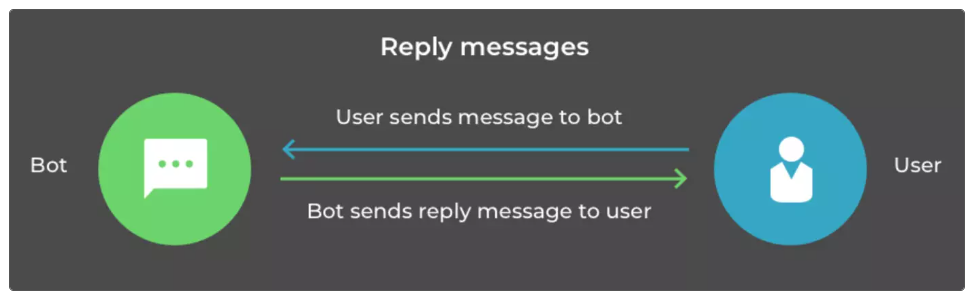

##### 回覆文字訊息 
使用 reply_message 的「TextSendMessage」方法 ( 需要 import )，能夠回覆文字訊息，相關參數如下：

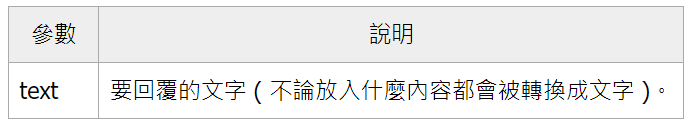

使用下方的程式碼執行後，使用者輸入了什麼訊息，LINE BOT 就會回覆一模一樣的文字訊息。

* 注意，如果是 ngrok 產生的網址，每次重新執行就要再進入 LINE Developer 更新 Webhook。

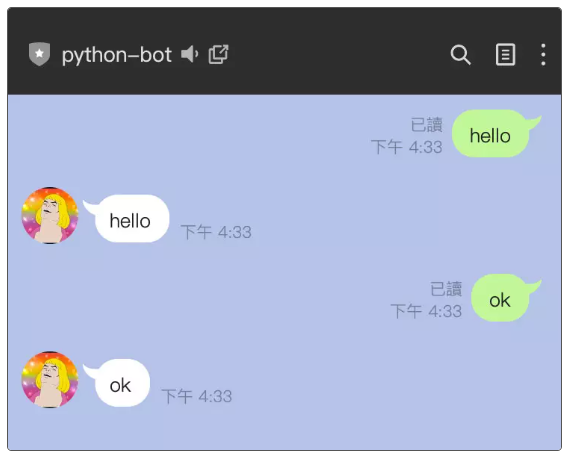

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok    # Colab 使用，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage

import json

app = Flask(__name__)

# Colab 使用，本機環境不需要下面三行
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        # '你的 access token'
        access_token = 'jOf8WWCSyfrnGShm2Ts9crr3EdptnrXvby1dZwuiJVECogLjRc6bgRGrXhpLQDnot1SeeAHH2tp9d0EpJ4sjGC944nd5dY3btiCge69T/wdB04t89/1O/w1cDnyilFU='
        # '你的 channel secret'
        secret = 'fe4dbec83f15f374'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        msg = json_data['events'][0]['message']['text']      # 取得 LINE 收到的文字訊息
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        line_bot_api.reply_message(tk,TextSendMessage(msg))  # 回傳訊息
        print(msg, tk)                                       # 印出內容
    except:
        print(body)                                          # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
  app.run()

##### 回覆表情貼圖 
使用 reply_message 的「StickerSendMessage」方法 ( 需要 import )，能夠回覆表情貼圖，相關參數如下：

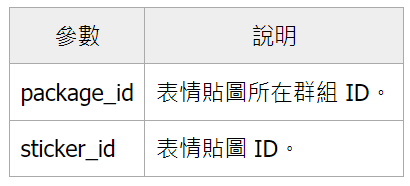

LINE BOT 預設的表情貼圖只有 LINE 官方所提供的貼圖，支援的表情貼圖參考：List of available stickers。

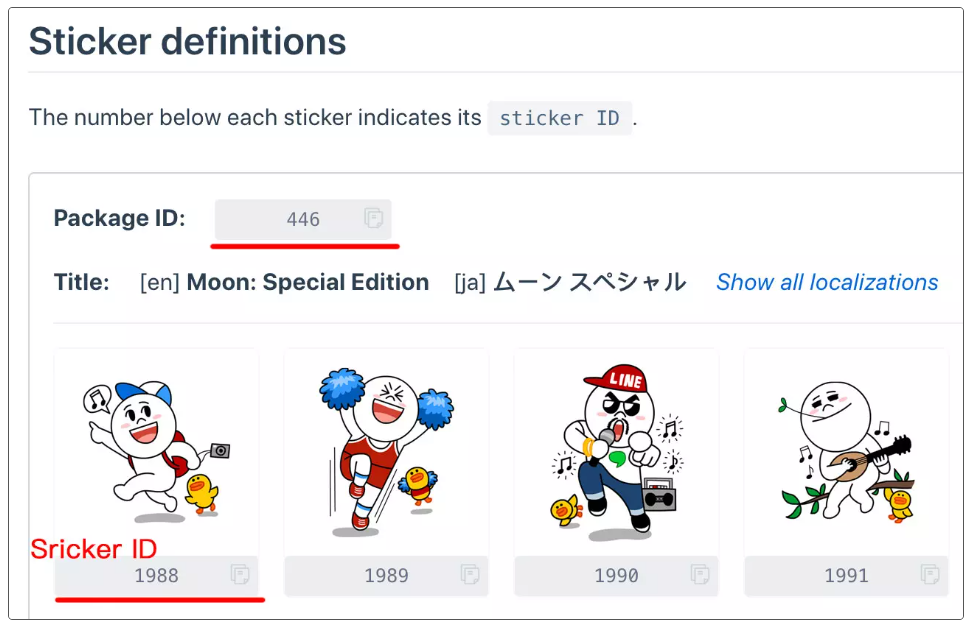

下方的程式碼執行後，當使用者傳送了表情貼圖，LINE BOT 就會回覆一模一樣的表情貼圖 ( 限制為官方預設的表情貼圖 )。

* 注意，如果是 ngrok 產生的網址，每次重新執行就要再進入 LINE Developer 更新 Webhook。

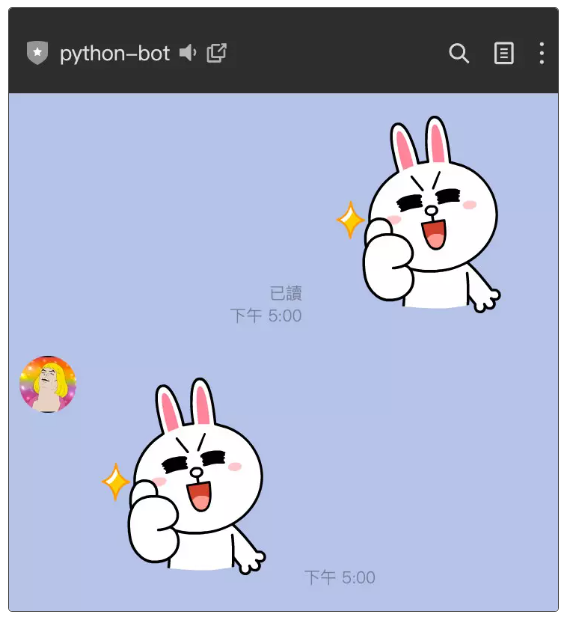

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok    ＃ Colab 使用，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage
# 注意，有載入 StickerSendMessage 模組

import json

app = Flask(__name__)

# Colab 使用，本機環境不需要下面三行
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        # '你的 access token'
        access_token = 'jOf8WWCSyfrnGShm2Ts9crr3'
        # '你的 channel secret'
        secret = 'fe4db'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        stickerId = json_data['events'][0]['message']['stickerId'] # 取得 stickerId
        packageId = json_data['events'][0]['message']['packageId'] # 取得 packageId
        sticker_message = StickerSendMessage(sticker_id=stickerId, package_id=packageId) # 設定要回傳的表情貼圖
        line_bot_api.reply_message(tk, sticker_message)  # 回傳訊息
    except:
        print(body)                                          # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 回覆圖片或影片訊息 
使用 reply_message 的「ImageSendMessage」或「VideoSendMessage」方法 ( 需要 import )，能夠回覆圖片或影片，相關參數如下：

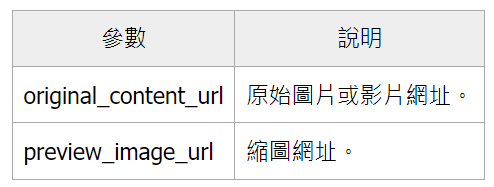

下方的程式碼執行後，當使用者傳送了某個文字，LINE BOT 就會回覆跟這個文字有關的圖片 ( 先建立好圖片網址和文字對照的字典，圖片來源是維基百科 )，\
如果找不到文字對應的圖片，就會回傳「找不到相關圖片」。

注意，如果是 ngrok + Colab 產生的網址，每次重新執行就要再進入 LINE Developer 更新 Webhook。

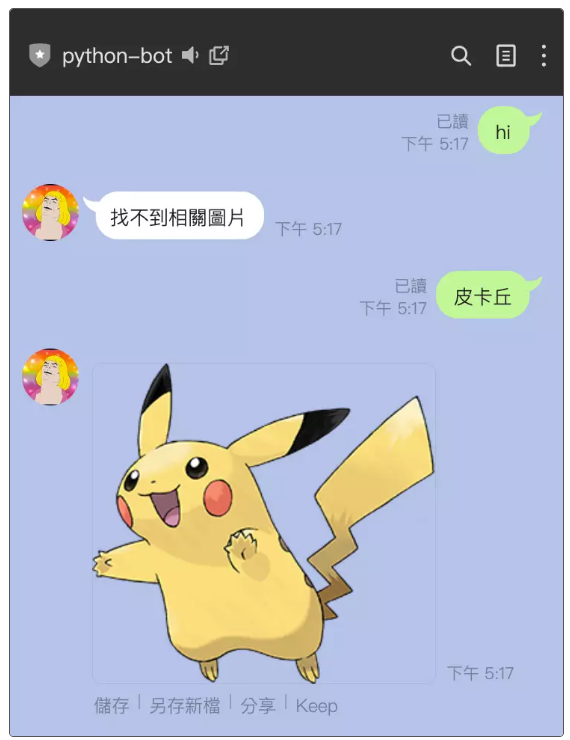

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok   # Colab 環境需要，本機環境不需要


# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage
# 注意，有載入 ImageSendMessage 模組

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        # '你的 access token'
        access_token = 'jOf8WWCSyfrnGShm2Ts9crr3EdptnrXv='
        # '你的 channel secret'
        secret = 'fe4dbeb'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        msg = json_data['events'][0]['message']['text']
        if msg == '皮卡丘':
            # 如果有圖片網址，回傳圖片
            img_url = 'https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png'
            img_message = ImageSendMessage(original_content_url=img_url, preview_image_url=img_url)
            line_bot_api.reply_message(tk,img_message)
        else:
            # 如果沒有 msg，回傳文字
            text_message = TextSendMessage(text='找不到相關圖片')
            line_bot_api.reply_message(tk,text_message)
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 回覆地址訊息 
使用 reply_message 的「LocationSendMessage」方法 ( 需要 import )，能夠回覆地址訊息，相關參數如下：

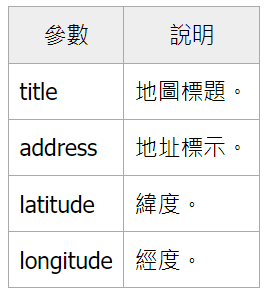

下方的程式碼執行後，當使用者傳送了某個地點的文字，LINE BOT 就會回覆跟這個地點的地圖 ( 先建立文字和地址、經緯度的對照字典 )，\
如果找不到文字對應的地址，就會回傳「找不到相關地點」。

* 注意，如果是 ngrok 產生的網址，每次重新執行就要再進入 LINE Developer 更新 Webhook。

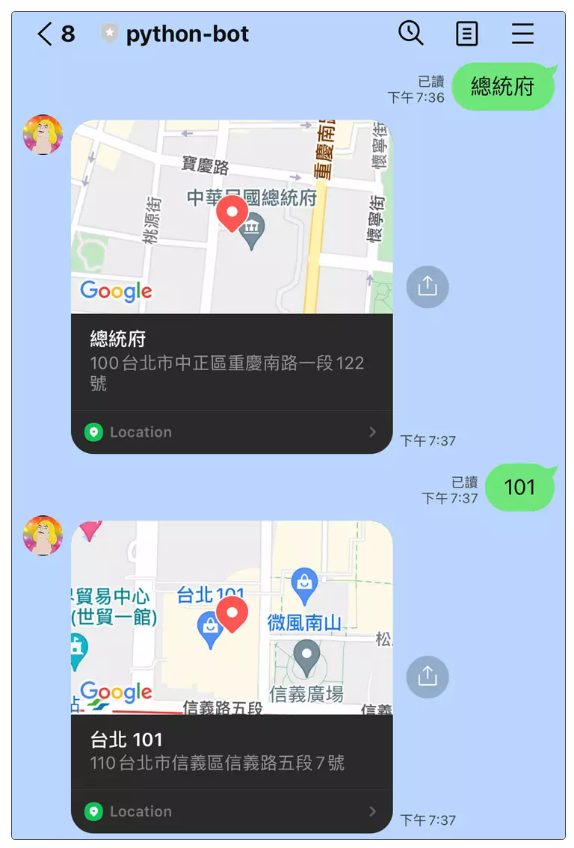

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage
# 注意，有載入 LocationSendMessage 模組

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        # '你的 access token'
        access_token = 'jOf8WWCSyfrnGShm2Ts9crr3EdptnrXvby1dZ'
        # '你的 channel secret'
        secret = 'fe4dbeb2c'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        msg = json_data['events'][0]['message']['text']
        if msg == '101':
            # 如果有地點資訊，回傳地點
            location_message = LocationSendMessage(title='台北 101',
                                                    address='110台北市信義區信義路五段7號',
                                                    latitude='25.034095712145003',
                                                    longitude='121.56489941996108')
            line_bot_api.reply_message(tk,location_message)
        elif msg == '澄清湖':
            # 如果有地點資訊，回傳地點
            location_message = LocationSendMessage(title='高雄 澄清湖',
                                                    address='833高雄市鳥松區大埤路32號',
                                                    latitude='22.660802500374537',
                                                    longitude='120.355136986113')
            line_bot_api.reply_message(tk,location_message)
        else:
            # 如果是 False，回傳文字
            text_message = TextSendMessage(text='找不到相關地點')
            line_bot_api.reply_message(tk,text_message)
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 部署程式到 Google Cloud Functions 
因為使用 ngrok + Colab 的 Python 程式，只會運作幾個小時就停止，甚至再次執行時需要重新安裝相關函式庫，\
所以只能作為「開發中」使用，如果要真正建構 LINE BOT 的 Python 程式，除了可以使用類似 Heroku 之類的雲端伺服器，\
也可以直接使用 Google Cloud Functions 部署程式。

* 參考：使用 Google Cloud Functions

登入 Google 帳號，啟用 Google Cloud 和 Cloud Functions 後，建立一支 Cloud Functions 的程式，環境設定為 Python 3.7～3.9，進入點設定為 linebot。

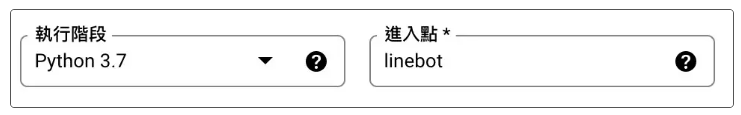

編輯 requirements.txt，在 Cloud Functions 安裝 line-bot-sdk 函式庫。

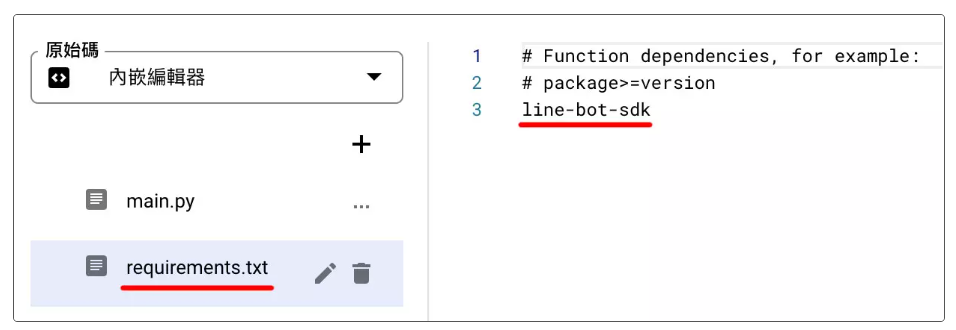

編輯 main.py 主程式檔案，撰寫下方 Python 程式碼，綜合上方所有的範例，程式碼執行後會自動回覆使用者的訊息、表情貼圖、圖片與地點資訊。

In [ ]:
import json
from linebot import LineBotApi, WebhookHandler
# 載入對應的函式庫
from linebot.models import TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

def linebot(request):
    try:
        body = request.get_data(as_text=True)
        json_data = json.loads(body)                           # json 格式化收到的訊息
        line_bot_api = LineBotApi('你的 Channel access token')  # 輸入 你的 Channel access token
        handler = WebhookHandler('你的 Channel secret')         # 輸入 你的 Channel secret
        signature = request.headers['X-Line-Signature']
        handler.handle(body, signature)
        tk = json_data['events'][0]['replyToken']       # 取得 reply token
        tp = json_data['events'][0]['message']['type']  # 取得 message 的類型
        if tp == 'text':
            # 如果是文字類型的訊息
            msg = reply_msg(json_data['events'][0]['message']['text'])   # 取出文字並對應到 reply_msg 的函式
            if msg[0] == 'text':
                # 如果要回傳的訊息是 text，使用 TextSendMessage 方法
                line_bot_api.reply_message(tk,TextSendMessage(text=msg[1]))
            if msg[0] == 'location':
                # 如果要回傳的訊息是 location，使用 LocationSendMessage 方法
                line_bot_api.reply_message(tk,LocationSendMessage(title=msg[1]['title'],
                                                                address=msg[1]['address'],
                                                                latitude=msg[1]['latitude'],
                                                                longitude=msg[1]['longitude']))
            if msg[0] == 'image':
                # 如果要回傳的訊息是 image，使用 ImageSendMessage 方法
                line_bot_api.reply_message(tk,ImageSendMessage(original_content_url=msg[1],
                                                                preview_image_url=msg[1]))
        if tp == 'sticker':
            # 如果收到的訊息是表情貼圖
            stickerId = json_data['events'][0]['message']['stickerId'] # 取得 stickerId
            packageId = json_data['events'][0]['message']['packageId'] # 取得 packageId
            # 使用 StickerSendMessage 方法回傳同樣的表情貼圖
            line_bot_api.reply_message(tk,StickerSendMessage(sticker_id=stickerId, package_id=packageId))
        if tp == 'location':
            # 如果是收到的訊息是地點資訊
            line_bot_api.reply_message(tk,TextSendMessage(text='好地點！'))
        if tp == 'image':
            # 如果是收到的訊息是圖片
            line_bot_api.reply_message(tk,TextSendMessage(text='好圖給讚！'))
        if tp == 'audio':
            # 如果是收到的訊息是聲音
            line_bot_api.reply_message(tk,TextSendMessage(text='聲音讚喔～'))
        if tp == 'video':
            # 如果是收到的訊息是影片
            line_bot_api.reply_message(tk,TextSendMessage(text='影片內容真是不錯！'))
    except:
        print('error', body)
    return 'OK'
# 定義回覆訊息的函式
def reply_msg(text):
    # 客製化回覆文字
    msg_dict = {
        'hi':'Hi! 你好呀～',
        'hello':'Hello World!!!!',
        '你好':'你好呦～',
        'help':'有什麼要幫忙的嗎？'
    }
    # 如果出現特定地點，提供地點資訊
    local_dict = {
        '總統府':{
            'title':'總統府',
            'address':'100台北市中正區重慶南路一段122號',
            'latitude':'25.040319874750914',
            'longitude':'121.51162883484746'
        }
    }
    # 如果出現特定圖片文字，提供圖片網址
    img_dict = {
        '皮卡丘':'https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png',
        '傑尼龜':'https://upload.wikimedia.org/wikipedia/en/5/59/Pok%C3%A9mon_Squirtle_art.png'
    }
    # 預設回覆的文字就是收到的訊息
    reply_msg_content = ['text',text]
    if text in msg_dict:
        reply_msg_content = ['text',msg_dict[text.lower()]]
    if text in local_dict:
        reply_msg_content = ['location',local_dict[text.lower()]]
    if text in img_dict:
        reply_msg_content = ['image',img_dict[text.lower()]]
    return reply_msg_content

編輯完成後，部署程式，出現綠色打勾圖示表示部署完成。

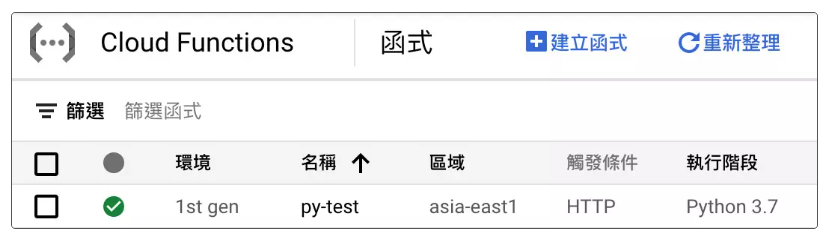

程式部署後，選擇「觸發條件」頁籤，複製觸發的網址，更新 LINE Developer 的 Webhook。

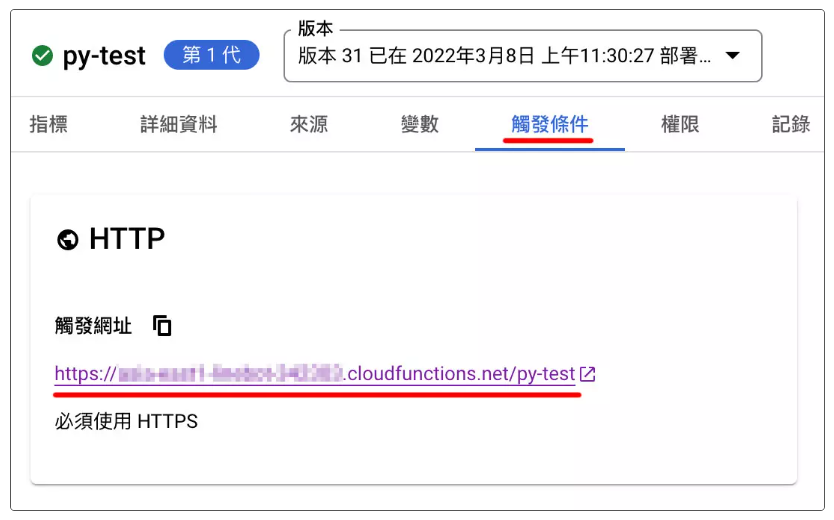

驗證 Webhook 沒問題後，就可以在 LINE 與自己開發的 LINE BOT 聊天了。

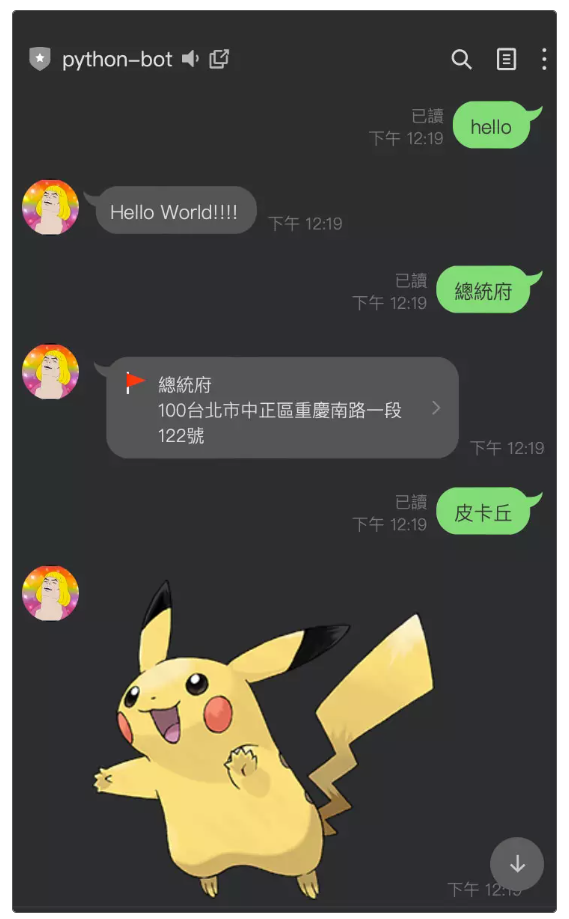

##### 小結 
了解 LINE Message API 回覆訊息的原理後，就能輕鬆做出一個會自動回覆訊息的 LINE BOT，不過回覆訊息的機制是「一來一往」，\
只有在發送訊息後取得 reply token 才能回覆訊息，如果要主動推播訊息，則需要使用 push messsage 的方式才能實現。